In [116]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot  as plt

# Purpose

Author: Chris Kuzemka

The purpose of this notebook is to check what is housed inside the kaggle dataset of flight itineraries. The dataset is a large and computationally expensive. It can be downloaded [here](https://www.kaggle.com/datasets/dilwong/flightprices/data). 

Details and a report going over what is found will be placed here as well as a summary of what to clean and change. 

# Data

In [117]:
# do this to show all the columns....note setting None means there are no restrictions on any of this. 
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', 300)

In [118]:
df = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Fordham\Programming with Python (CISC-5380-L01)\intro_to_python_project\data\jetblue_df.csv")

In [119]:
df.head()

,Unnamed: 0,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,5,79eda9f841e226a1e2121d74211e595c,2022-04-16,2022-04-17,ATL,BOS,VH0AUEL1,PT2H38M,0,False,False,True,217.67,248.60,7,947.0,1650206700,2022-04-17T10:45:00.000-04:00,1650216180,2022-04-17T13:23:00.000-04:00,BOS,ATL,JetBlue Airways,B6,NaN,9480,947,coach
1,29,24c07cf38de8a7a0ed2d7709168042a8,2022-04-16,2022-04-17,ATL,BOS,QH0KUEL1,PT2H44M,0,False,False,True,316.73,355.09,7,947.0,1650233220,2022-04-17T18:07:00.000-04:00,1650243060,2022-04-17T20:51:00.000-04:00,BOS,ATL,JetBlue Airways,B6,NaN,9840,947,coach
2,57,a291a2b5ac19223c3407cfec58d1fc24,2022-04-16,2022-04-17,ATL,CLT,VH0AUEL1,PT8H48M,0,False,False,False,482.79,542.60,7,1675.0,1650206700||1650229500,2022-04-17T10:45:00.000-04:00||2022-04-17T17:0...,1650216180||1650238380,2022-04-17T13:23:00.000-04:00||2022-04-17T19:3...,BOS||CLT,ATL||BOS,JetBlue Airways||JetBlue Airways,B6||B6,||Embraer 190,9480||8880,947||728,coach||coach
3,146,d53bcf9e8b6523fa2de9420d7cb22196,2022-04-16,2022-04-17,ATL,DTW,RH0AUEL1,PT5H8M,0,False,False,False,269.78,313.61,7,1247.0,1650235800||1650246600,2022-04-17T18:50:00.000-04:00||2022-04-17T21:5...,1650244380||1650254280,2022-04-17T21:13:00.000-04:00||2022-04-17T23:5...,JFK||DTW,ATL||JFK,JetBlue Airways||JetBlue Airways,B6||B6,Embraer 190||Embraer 190,8580||7680,762||485,coach||coach
4,209,5bb138f39804320ece767e747608a50e,2022-04-16,2022-04-17,ATL,EWR,VC0QBEL1,PT2H9M,0,False,False,True,171.16,198.60,7,762.0,1650195000,2022-04-17T07:30:00.000-04:00,1650202740,2022-04-17T09:39:00.000-04:00,EWR,ATL,JetBlue Airways,B6,Embraer 190,7740,762,coach


In [120]:
sorted(df.columns)

['Unnamed: 0',
 'baseFare',
 'destinationAirport',
 'elapsedDays',
 'fareBasisCode',
 'flightDate',
 'isBasicEconomy',
 'isNonStop',
 'isRefundable',
 'legId',
 'searchDate',
 'seatsRemaining',
 'segmentsAirlineCode',
 'segmentsAirlineName',
 'segmentsArrivalAirportCode',
 'segmentsArrivalTimeEpochSeconds',
 'segmentsArrivalTimeRaw',
 'segmentsCabinCode',
 'segmentsDepartureAirportCode',
 'segmentsDepartureTimeEpochSeconds',
 'segmentsDepartureTimeRaw',
 'segmentsDistance',
 'segmentsDurationInSeconds',
 'segmentsEquipmentDescription',
 'startingAirport',
 'totalFare',
 'totalTravelDistance',
 'travelDuration']

In [121]:
df.shape

(6824440, 28)

In [122]:
df.size

191084320

# EDA

## Null Handling

In [123]:
print("Finding nulls per column")
df.isnull().any()

Finding nulls per column


Unnamed: 0                           False
legId                                False
searchDate                           False
flightDate                           False
startingAirport                      False
destinationAirport                   False
fareBasisCode                        False
travelDuration                       False
elapsedDays                          False
isBasicEconomy                       False
isRefundable                         False
isNonStop                            False
baseFare                             False
totalFare                            False
seatsRemaining                       False
totalTravelDistance                   True
segmentsDepartureTimeEpochSeconds    False
segmentsDepartureTimeRaw             False
segmentsArrivalTimeEpochSeconds      False
segmentsArrivalTimeRaw               False
segmentsArrivalAirportCode           False
segmentsDepartureAirportCode         False
segmentsAirlineName                  False
segmentsAir

Above, we find that `totalTravelDistance`, `segmentsEquipmentDescription`, and `segmentsDistance` contain nulls. Now, let's see the information on these columns in particular. 

In [124]:
print("Observing null columns")
df[["totalTravelDistance", "segmentsEquipmentDescription", "segmentsDistance"]].head()

Observing null columns


,totalTravelDistance,segmentsEquipmentDescription,segmentsDistance
0,947.0,NaN,947
1,947.0,NaN,947
2,1675.0,||Embraer 190,947||728
3,1247.0,Embraer 190||Embraer 190,762||485
4,762.0,Embraer 190,762


<a id='questions_1'></a>

The information above showcases distances and types of aircraft. This information could be important in building a model that can use different features to ultimately predict price. However, some of this information may also contribute nothing more than bloat to a model. Some questions that come to mind:

- <font color="green">[CLOSED]</font> what is the difference between `totalTravelDistance` and `segmentsDistance`?
    -  per the dictionary: `totalTravelDistance` is the total distance traveled in miles. It's reported by the dataset author that some of this data may be missing. The `segmentsDistance` is the distance in miles for each leg of the trip. 
- <font color="red">[OPEN]</font> will an end-product tremendously benefit from the knowledge of the kind of aircraft found in `segmentsEquipmentDescription`?
    - not truly sure when we can determine if this will be useful or not for a model. 

In [125]:
def detect_nulls(df):
    null_counts = df.isna().sum()
    null_percentages = (null_counts / len(df)) * 100
    null_summary = pd.concat([null_counts, null_percentages], axis=1, keys=['Null Count', 'Null Percentage'])
    null_summary = null_summary[null_summary['Null Count']>0]
    return null_summary

# Detect and display nulls
null_summary = detect_nulls(df)
display(null_summary)
print("\nTotal number of rows:", len(df))

,Null Count,Null Percentage
totalTravelDistance,56436,0.826969
segmentsEquipmentDescription,52443,0.768459
segmentsDistance,19469,0.285283



Total number of rows: 6824440


The biggest offender of nulls is the `totalTravelDistance` column, where ~0.83% of this column contains nulls.

Here is when we looked at the data dictionary and were able to address more information on this column. Thus, we were able to also simultaneously address the first question found in [the previous cell housing some initial questions](#questions_1)

Per the linked cell written in this current cell, it is expected that this column contains missing values. However, we do not know why. 

The next step will focus on some of these instances where `totalTravelDistance` is null. Furthermore, we should note if `segmentsDistance` is also null in these areas. There may be a possibility where the segments feature might have the information missing in the total distance feature or vice versa. Or they both will be null together where appropriate. 

In [126]:
 # Investigating relationships between null values

null_combinations = df.groupby([
    df['totalTravelDistance'].isnull(),
    df['segmentsEquipmentDescription'].isnull(),
    df['segmentsDistance'].isnull()
]).size()
display(null_combinations)

totalTravelDistance  segmentsEquipmentDescription  segmentsDistance
False                False                         False               6715947
                     True                          False                 52057
True                 False                         False                 36967
                                                   True                  19083
                     True                          True                    386
dtype: int64

1. Rows with no nulls: 6715947 (98.41%)
2. Rows with null only in segmentsEquipmentDescription: 52057 (0.76%)
3. Rows with null only in totalTravelDistance: 36967 (0.54%)
4. Rows with null in totalTravelDistance and segmentsDistance: 19083 (0.28%)
5. Rows with null in all three columns: 386 (0.01%)

The dataset has a very low percentage of null values overall.
Most rows (98.41%) have no nulls in these columns.
The null percentages for each column are still below 1%.

In [127]:
df.dropna(inplace=True)
df.shape

(6715947, 28)

I saw some places where `"||"` exists for either segments distance or equipment. 

To see such, I should look at the distinct values of these dataframes. 

In [128]:
columns_to_see_classification_error_in = ["segmentsEquipmentDescription", "segmentsAirlineCode", "segmentsAirlineName", "segmentsArrivalAirportCode", "segmentsArrivalTimeEpochSeconds", "segmentsDepartureTimeEpochSeconds", "segmentsCabinCode"]
print(columns_to_see_classification_error_in)
for col in columns_to_see_classification_error_in[1:3]:
    print(f'unique value without duplicates for column {col}')
    print(sorted(df[col].unique()))


['segmentsEquipmentDescription', 'segmentsAirlineCode', 'segmentsAirlineName', 'segmentsArrivalAirportCode', 'segmentsArrivalTimeEpochSeconds', 'segmentsDepartureTimeEpochSeconds', 'segmentsCabinCode']
unique value without duplicates for column segmentsAirlineCode
['9K||9K||9K||B6', '9K||9K||B6', '9K||B6', '9K||B6||B6', 'AA||B6', 'B6', 'B6||3M||B6', 'B6||9K', 'B6||9K||9K', 'B6||9K||B6', 'B6||AA', 'B6||B6', 'B6||B6||9K', 'B6||B6||B6']
unique value without duplicates for column segmentsAirlineName
['American Airlines||JetBlue Airways', 'Cape Air||Cape Air||Cape Air||JetBlue Airways', 'Cape Air||Cape Air||JetBlue Airways', 'Cape Air||JetBlue Airways', 'Cape Air||JetBlue Airways||JetBlue Airways', 'JetBlue Airways', 'JetBlue Airways||American Airlines', 'JetBlue Airways||Cape Air', 'JetBlue Airways||Cape Air||Cape Air', 'JetBlue Airways||Cape Air||JetBlue Airways', 'JetBlue Airways||JetBlue Airways', 'JetBlue Airways||JetBlue Airways||Cape Air', 'JetBlue Airways||JetBlue Airways||JetBlue A

Consider dropping `segmentsAirlineCode` and `segments EquimentDescription`

In [129]:
df.drop(columns=['segmentsEquipmentDescription','segmentsAirlineCode','Unnamed: 0'],inplace=True)
sorted(df.columns)

['baseFare',
 'destinationAirport',
 'elapsedDays',
 'fareBasisCode',
 'flightDate',
 'isBasicEconomy',
 'isNonStop',
 'isRefundable',
 'legId',
 'searchDate',
 'seatsRemaining',
 'segmentsAirlineName',
 'segmentsArrivalAirportCode',
 'segmentsArrivalTimeEpochSeconds',
 'segmentsArrivalTimeRaw',
 'segmentsCabinCode',
 'segmentsDepartureAirportCode',
 'segmentsDepartureTimeEpochSeconds',
 'segmentsDepartureTimeRaw',
 'segmentsDistance',
 'segmentsDurationInSeconds',
 'startingAirport',
 'totalFare',
 'totalTravelDistance',
 'travelDuration']

In [130]:
df.shape

(6715947, 25)

In [131]:
df.groupby(df['segmentsAirlineName']).size().sort_values(ascending=False)

segmentsAirlineName
JetBlue Airways                                      3506867
JetBlue Airways||JetBlue Airways                     3092858
JetBlue Airways||JetBlue Airways||JetBlue Airways     108877
JetBlue Airways||Cape Air||Cape Air                     2142
Cape Air||JetBlue Airways                               1842
JetBlue Airways||Cape Air                               1353
JetBlue Airways||Cape Air||JetBlue Airways              1035
American Airlines||JetBlue Airways                       388
Cape Air||Cape Air||JetBlue Airways                      249
JetBlue Airways||JetBlue Airways||Cape Air               126
Cape Air||JetBlue Airways||JetBlue Airways               116
JetBlue Airways||Silver Airways||JetBlue Airways          80
JetBlue Airways||American Airlines                        13
Cape Air||Cape Air||Cape Air||JetBlue Airways              1
dtype: int64

## ** Feature Engineering

CREATE `days left` COLUMN

In [132]:
df.tail()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
6824435,6cf87e4163de23cc0ad1791685d37535,2022-10-05,2022-11-12,ORD,ATL,OI3QUEL1,PT13H4M,1,False,False,False,156.28,197.20,7,1809.0,1668301200||1668337500,2022-11-12T19:00:00.000-06:00||2022-11-13T06:0...,1668309480||1668348240,2022-11-12T22:18:00.000-05:00||2022-11-13T09:0...,BOS||ATL,ORD||BOS,JetBlue Airways||JetBlue Airways,8280||10740,862||947,coach||coach
6824436,a2c33f479416f3420866a35576d8e80e,2022-10-05,2022-11-12,ORD,DEN,PI4QUEL1,PT10H2M,0,False,False,False,134.88,168.60,7,2363.0,1668253500||1668274200,2022-11-12T05:45:00.000-06:00||2022-11-12T12:3...,1668261300||1668289620,2022-11-12T08:55:00.000-05:00||2022-11-12T14:4...,JFK||DEN,ORD||JFK,JetBlue Airways||JetBlue Airways,7800||15420,731||1632,coach||coach
6824437,c33ada499ceb9ea377107976f23ed202,2022-10-05,2022-11-12,ORD,DFW,PI4QUEL1,PT7H43M,0,False,False,False,106.97,138.59,7,2115.0,1668289200||1668303000,2022-11-12T15:40:00.000-06:00||2022-11-12T20:3...,1668297360||1668316980,2022-11-12T18:56:00.000-05:00||2022-11-12T23:2...,JFK||DFW,ORD||JFK,JetBlue Airways||JetBlue Airways,8160||13980,731||1384,coach||coach
6824438,ea55464ecfb2a65dc0b3c82139e3983c,2022-10-05,2022-11-12,ORD,LAX,PI4QUEL1,PT15H56M,0,False,False,False,158.14,199.20,7,3145.0,1668264420||1668299400,2022-11-12T08:47:00.000-06:00||2022-11-12T19:3...,1668272340||1668321780,2022-11-12T11:59:00.000-05:00||2022-11-12T22:4...,JFK||ONT,ORD||JFK,JetBlue Airways||JetBlue Airways,7920||22380,731||2414,coach||coach
6824439,8ee566ea485df9c07d69ff7e392954b8,2022-10-05,2022-11-12,ORD,LAX,PI4QUEL1,PT9H19M,0,False,False,False,190.69,228.59,7,3198.0,1668253500||1668264540,2022-11-12T05:45:00.000-06:00||2022-11-12T09:4...,1668261300||1668287040,2022-11-12T08:55:00.000-05:00||2022-11-12T13:0...,JFK||LAX,ORD||JFK,JetBlue Airways||JetBlue Airways,7800||22500,731||2467,coach||coach


In [133]:
print("Data types before conversion:")
print(df[['searchDate', 'flightDate']].dtypes)
print(df[['searchDate', 'flightDate']].head())

Data types before conversion:
searchDate    object
flightDate    object
dtype: object
   searchDate  flightDate
2  2022-04-16  2022-04-17
3  2022-04-16  2022-04-17
4  2022-04-16  2022-04-17
5  2022-04-16  2022-04-17
6  2022-04-16  2022-04-17


In [134]:
def days_left_col(df):
    # Convert 'searchDate' and 'flightDate' to datetime, handling potential errors
    df['searchDate'] = pd.to_datetime(df['searchDate'], format='%Y-%m-%d', errors='coerce')
    df['flightDate'] = pd.to_datetime(df['flightDate'], format='%Y-%m-%d', errors='coerce')
    
    # Ensure the columns are of datetime type
    df['searchDate'] = df['searchDate'].astype('datetime64[ns]')
    df['flightDate'] = df['flightDate'].astype('datetime64[ns]')
    
    print("\nData types after conversion:")
    print(df[['searchDate', 'flightDate']].dtypes)
    print(df[['searchDate', 'flightDate']].head())
    
    # Create the 'daysleft' column by calculating the difference
    df['daysleft'] = (df['flightDate'] - df['searchDate']).dt.days
    return df

days_left_col(df)

print('DataFrame:')
df.head()


Data types after conversion:
searchDate    datetime64[ns]
flightDate    datetime64[ns]
dtype: object
  searchDate flightDate
2 2022-04-16 2022-04-17
3 2022-04-16 2022-04-17
4 2022-04-16 2022-04-17
5 2022-04-16 2022-04-17
6 2022-04-16 2022-04-17
DataFrame:


,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,daysleft
2,a291a2b5ac19223c3407cfec58d1fc24,2022-04-16,2022-04-17,ATL,CLT,VH0AUEL1,PT8H48M,0,False,False,False,482.79,542.60,7,1675.0,1650206700||1650229500,2022-04-17T10:45:00.000-04:00||2022-04-17T17:0...,1650216180||1650238380,2022-04-17T13:23:00.000-04:00||2022-04-17T19:3...,BOS||CLT,ATL||BOS,JetBlue Airways||JetBlue Airways,9480||8880,947||728,coach||coach,1
3,d53bcf9e8b6523fa2de9420d7cb22196,2022-04-16,2022-04-17,ATL,DTW,RH0AUEL1,PT5H8M,0,False,False,False,269.78,313.61,7,1247.0,1650235800||1650246600,2022-04-17T18:50:00.000-04:00||2022-04-17T21:5...,1650244380||1650254280,2022-04-17T21:13:00.000-04:00||2022-04-17T23:5...,JFK||DTW,ATL||JFK,JetBlue Airways||JetBlue Airways,8580||7680,762||485,coach||coach,1
4,5bb138f39804320ece767e747608a50e,2022-04-16,2022-04-17,ATL,EWR,VC0QBEL1,PT2H9M,0,False,False,True,171.16,198.60,7,762.0,1650195000,2022-04-17T07:30:00.000-04:00,1650202740,2022-04-17T09:39:00.000-04:00,EWR,ATL,JetBlue Airways,7740,762,coach,1
5,8201f75d221c7aa5b78f3b7781166032,2022-04-16,2022-04-17,ATL,JFK,RC0ABEL1,PT2H15M,0,False,False,True,171.16,198.60,7,762.0,1650200400,2022-04-17T09:00:00.000-04:00,1650208500,2022-04-17T11:15:00.000-04:00,JFK,ATL,JetBlue Airways,8100,762,coach,1
6,a63591f2b4df39d809c4a45a3898e122,2022-04-16,2022-04-17,ATL,JFK,RC0ABEL1,PT2H23M,0,False,False,True,171.16,198.60,7,762.0,1650235800,2022-04-17T18:50:00.000-04:00,1650244380,2022-04-17T21:13:00.000-04:00,JFK,ATL,JetBlue Airways,8580,762,coach,1


In [135]:
# Function to check if a flight is a partnership flight
partnership_flights=df[~df['segmentsAirlineName'].isin(['JetBlue Airways', 
                                  'JetBlue Airways||JetBlue Airways',
                                  'JetBlue Airways||JetBlue Airways||JetBlue Airways'])
 ]
jetblue_only_flights = df[df['segmentsAirlineName'].isin(['JetBlue Airways', 
                                  'JetBlue Airways||JetBlue Airways',
                                  'JetBlue Airways||JetBlue Airways||JetBlue Airways'])]
print('Partnership Flights dataset')
display(partnership_flights.head())

print(partnership_flights.groupby('segmentsAirlineName').size().sort_values(ascending=False))

print('\nJetblue-only Flights dataset')
display(jetblue_only_flights.head())

jetblue_only_flights.groupby('segmentsAirlineName').size().sort_values(ascending=False)

Partnership Flights dataset


,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,daysleft
2709,60b9af875d280cd59a1779446763fe65,2022-04-16,2022-04-23,ATL,BOS,EH0JUEY5,PT7H35M,0,False,False,False,1264.19,1378.10,1,1011.0,1650718800||1650730200||1650743700,2022-04-23T09:00:00.000-04:00||2022-04-23T12:1...,1650726900||1650734580||1650746100,2022-04-23T11:15:00.000-04:00||2022-04-23T13:2...,JFK||MVY||BOS,ATL||JFK||MVY,JetBlue Airways||Cape Air||Cape Air,8100||4380||2400,762||179||70,coach||coach||coach,7
7015,60b9af875d280cd59a1779446763fe65,2022-04-17,2022-04-23,ATL,BOS,EH0JUEY5,PT7H35M,0,False,False,False,1264.19,1378.10,1,1011.0,1650718800||1650730200||1650743700,2022-04-23T09:00:00.000-04:00||2022-04-23T12:1...,1650726900||1650734580||1650746100,2022-04-23T11:15:00.000-04:00||2022-04-23T13:2...,JFK||MVY||BOS,ATL||JFK||MVY,JetBlue Airways||Cape Air||Cape Air,8100||4380||2400,762||179||70,coach||coach||coach,6
9377,d431c81265674874a3f8f18a1f0ef8b1,2022-04-17,2022-04-27,JFK,BOS,BIP,PT4H16M,0,False,False,False,198.40,232.38,1,472.0,1651078500||1651088700,2022-04-27T12:55:00.000-04:00||2022-04-27T15:4...,1651085400||1651093860,2022-04-27T14:50:00.000-04:00||2022-04-27T17:1...,SLK||BOS,JFK||SLK,Cape Air||JetBlue Airways,6900||5160,258||214,coach||coach,10
10676,e0542e15580d9e163701750792758fdb,2022-04-17,2022-04-29,JFK,BOS,KIP,PT4H16M,0,False,False,False,263.52,302.38,1,472.0,1651251300||1651261500,2022-04-29T12:55:00.000-04:00||2022-04-29T15:4...,1651258200||1651266660,2022-04-29T14:50:00.000-04:00||2022-04-29T17:1...,SLK||BOS,JFK||SLK,Cape Air||JetBlue Airways,6900||5160,258||214,coach||coach,12
11275,dc066995b773eeb35b39dc378a7984c2,2022-04-17,2022-04-30,JFK,BOS,BIP,PT4H16M,0,False,False,False,198.40,232.38,1,472.0,1651337700||1651347900,2022-04-30T12:55:00.000-04:00||2022-04-30T15:4...,1651344600||1651353060,2022-04-30T14:50:00.000-04:00||2022-04-30T17:1...,SLK||BOS,JFK||SLK,Cape Air||JetBlue Airways,6900||5160,258||214,coach||coach,13


segmentsAirlineName
JetBlue Airways||Cape Air||Cape Air                 2142
Cape Air||JetBlue Airways                           1842
JetBlue Airways||Cape Air                           1353
JetBlue Airways||Cape Air||JetBlue Airways          1035
American Airlines||JetBlue Airways                   388
Cape Air||Cape Air||JetBlue Airways                  249
JetBlue Airways||JetBlue Airways||Cape Air           126
Cape Air||JetBlue Airways||JetBlue Airways           116
JetBlue Airways||Silver Airways||JetBlue Airways      80
JetBlue Airways||American Airlines                    13
Cape Air||Cape Air||Cape Air||JetBlue Airways          1
dtype: int64

Jetblue-only Flights dataset


,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,daysleft
2,a291a2b5ac19223c3407cfec58d1fc24,2022-04-16,2022-04-17,ATL,CLT,VH0AUEL1,PT8H48M,0,False,False,False,482.79,542.60,7,1675.0,1650206700||1650229500,2022-04-17T10:45:00.000-04:00||2022-04-17T17:0...,1650216180||1650238380,2022-04-17T13:23:00.000-04:00||2022-04-17T19:3...,BOS||CLT,ATL||BOS,JetBlue Airways||JetBlue Airways,9480||8880,947||728,coach||coach,1
3,d53bcf9e8b6523fa2de9420d7cb22196,2022-04-16,2022-04-17,ATL,DTW,RH0AUEL1,PT5H8M,0,False,False,False,269.78,313.61,7,1247.0,1650235800||1650246600,2022-04-17T18:50:00.000-04:00||2022-04-17T21:5...,1650244380||1650254280,2022-04-17T21:13:00.000-04:00||2022-04-17T23:5...,JFK||DTW,ATL||JFK,JetBlue Airways||JetBlue Airways,8580||7680,762||485,coach||coach,1
4,5bb138f39804320ece767e747608a50e,2022-04-16,2022-04-17,ATL,EWR,VC0QBEL1,PT2H9M,0,False,False,True,171.16,198.60,7,762.0,1650195000,2022-04-17T07:30:00.000-04:00,1650202740,2022-04-17T09:39:00.000-04:00,EWR,ATL,JetBlue Airways,7740,762,coach,1
5,8201f75d221c7aa5b78f3b7781166032,2022-04-16,2022-04-17,ATL,JFK,RC0ABEL1,PT2H15M,0,False,False,True,171.16,198.60,7,762.0,1650200400,2022-04-17T09:00:00.000-04:00,1650208500,2022-04-17T11:15:00.000-04:00,JFK,ATL,JetBlue Airways,8100,762,coach,1
6,a63591f2b4df39d809c4a45a3898e122,2022-04-16,2022-04-17,ATL,JFK,RC0ABEL1,PT2H23M,0,False,False,True,171.16,198.60,7,762.0,1650235800,2022-04-17T18:50:00.000-04:00,1650244380,2022-04-17T21:13:00.000-04:00,JFK,ATL,JetBlue Airways,8580,762,coach,1


segmentsAirlineName
JetBlue Airways                                      3506867
JetBlue Airways||JetBlue Airways                     3092858
JetBlue Airways||JetBlue Airways||JetBlue Airways     108877
dtype: int64

**Classifying `segmentsDepartureTimeRaw` and `segmentsArrivalTimeRaw` into categories**

In [136]:
print('segmentDepartureTimeRaw')
display(df['segmentsDepartureTimeRaw'].head())


print('segmentArrivalTimeRaw')
display(df['segmentsArrivalTimeRaw'].head())

segmentDepartureTimeRaw


2    2022-04-17T10:45:00.000-04:00||2022-04-17T17:0...
3    2022-04-17T18:50:00.000-04:00||2022-04-17T21:5...
4                        2022-04-17T07:30:00.000-04:00
5                        2022-04-17T09:00:00.000-04:00
6                        2022-04-17T18:50:00.000-04:00
Name: segmentsDepartureTimeRaw, dtype: object

segmentArrivalTimeRaw


2    2022-04-17T13:23:00.000-04:00||2022-04-17T19:3...
3    2022-04-17T21:13:00.000-04:00||2022-04-17T23:5...
4                        2022-04-17T09:39:00.000-04:00
5                        2022-04-17T11:15:00.000-04:00
6                        2022-04-17T21:13:00.000-04:00
Name: segmentsArrivalTimeRaw, dtype: object

1. The times are in ISO 8601 format.
2. There might be multiple segments separated by "||" for flights with layovers.
3. extract the time from the first segment 

In [137]:
#function to convert segmentsDepartureTimeRaw' and 'segmentsArrivalTimeRaw' to time date
def extract_time(time_string):
    segments=time_string.split('||')
    first_segment=segments[0]
    #convert to datetime objects
    datetime=dt.fromisoformat(first_segment)
    return datetime.time() #return just time data

In [138]:
#TESTING THE METHOD

time_string = "2022-04-17T10:45:00.000-04:00||2022-04-17T13:23:00.000-04:00"
extracted_time = extract_time(time_string)
print(extracted_time)

10:45:00


In [139]:
#Use apply() for operations that need to be done row-wise or element-wise when a function takes individual elements or rows as inputs.
#Use direct function calls for vectorized operations or when the function operates on the entire DataFrame, as this is generally more efficient.
df['departureTime']=df['segmentsDepartureTimeRaw'].apply(extract_time)
df['ArrivalTime']=df['segmentsArrivalTimeRaw'].apply(extract_time)
# Print the DataFrame's name and show the tail to verify the new column
df.tail() # Display the last few rows to check the new column

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,daysleft,departureTime,ArrivalTime
6824435,6cf87e4163de23cc0ad1791685d37535,2022-10-05,2022-11-12,ORD,ATL,OI3QUEL1,PT13H4M,1,False,False,False,156.28,197.20,7,1809.0,1668301200||1668337500,2022-11-12T19:00:00.000-06:00||2022-11-13T06:0...,1668309480||1668348240,2022-11-12T22:18:00.000-05:00||2022-11-13T09:0...,BOS||ATL,ORD||BOS,JetBlue Airways||JetBlue Airways,8280||10740,862||947,coach||coach,38,19:00:00,22:18:00
6824436,a2c33f479416f3420866a35576d8e80e,2022-10-05,2022-11-12,ORD,DEN,PI4QUEL1,PT10H2M,0,False,False,False,134.88,168.60,7,2363.0,1668253500||1668274200,2022-11-12T05:45:00.000-06:00||2022-11-12T12:3...,1668261300||1668289620,2022-11-12T08:55:00.000-05:00||2022-11-12T14:4...,JFK||DEN,ORD||JFK,JetBlue Airways||JetBlue Airways,7800||15420,731||1632,coach||coach,38,05:45:00,08:55:00
6824437,c33ada499ceb9ea377107976f23ed202,2022-10-05,2022-11-12,ORD,DFW,PI4QUEL1,PT7H43M,0,False,False,False,106.97,138.59,7,2115.0,1668289200||1668303000,2022-11-12T15:40:00.000-06:00||2022-11-12T20:3...,1668297360||1668316980,2022-11-12T18:56:00.000-05:00||2022-11-12T23:2...,JFK||DFW,ORD||JFK,JetBlue Airways||JetBlue Airways,8160||13980,731||1384,coach||coach,38,15:40:00,18:56:00
6824438,ea55464ecfb2a65dc0b3c82139e3983c,2022-10-05,2022-11-12,ORD,LAX,PI4QUEL1,PT15H56M,0,False,False,False,158.14,199.20,7,3145.0,1668264420||1668299400,2022-11-12T08:47:00.000-06:00||2022-11-12T19:3...,1668272340||1668321780,2022-11-12T11:59:00.000-05:00||2022-11-12T22:4...,JFK||ONT,ORD||JFK,JetBlue Airways||JetBlue Airways,7920||22380,731||2414,coach||coach,38,08:47:00,11:59:00
6824439,8ee566ea485df9c07d69ff7e392954b8,2022-10-05,2022-11-12,ORD,LAX,PI4QUEL1,PT9H19M,0,False,False,False,190.69,228.59,7,3198.0,1668253500||1668264540,2022-11-12T05:45:00.000-06:00||2022-11-12T09:4...,1668261300||1668287040,2022-11-12T08:55:00.000-05:00||2022-11-12T13:0...,JFK||LAX,ORD||JFK,JetBlue Airways||JetBlue Airways,7800||22500,731||2467,coach||coach,38,05:45:00,08:55:00


**Classifying `departureTime` and `arrivalTime` into categories**

Late Night: 23:00 - 02:00

Early Morning: 03:00 - 06:00

Morning: 07:00 - 10:00

Noon: 11:00 - 14:00

Afternoon: 15:00 - 18:00

Evening: 19:00 - 22:00

In [140]:
def time_classification(time):
    hour=time.hour #get the hour from the time object
    #ex: 06:30 -> 6
    if hour in range(3,7): #03:00 - 06:00
        return 'Early Morning'
    elif hour in range(7,11):
        return 'Morning'
    elif hour in range(11,15):
        return 'Noon'
    elif hour in range(15,19):
        return 'Afternoon'
    elif hour in range(19,23):
        return 'Evening'
    elif hour in [23,0,1,2]: # 23:00 - 02:00 (covering late night)
        return 'Late night'
    else:
        return 'Unknown'
df['departure_category'] = df['departureTime'].apply(time_classification)
df['arrival_category'] = df['ArrivalTime'].apply(time_classification)
df.tail()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,daysleft,departureTime,ArrivalTime,departure_category,arrival_category
6824435,6cf87e4163de23cc0ad1791685d37535,2022-10-05,2022-11-12,ORD,ATL,OI3QUEL1,PT13H4M,1,False,False,False,156.28,197.20,7,1809.0,1668301200||1668337500,2022-11-12T19:00:00.000-06:00||2022-11-13T06:0...,1668309480||1668348240,2022-11-12T22:18:00.000-05:00||2022-11-13T09:0...,BOS||ATL,ORD||BOS,JetBlue Airways||JetBlue Airways,8280||10740,862||947,coach||coach,38,19:00:00,22:18:00,Evening,Evening
6824436,a2c33f479416f3420866a35576d8e80e,2022-10-05,2022-11-12,ORD,DEN,PI4QUEL1,PT10H2M,0,False,False,False,134.88,168.60,7,2363.0,1668253500||1668274200,2022-11-12T05:45:00.000-06:00||2022-11-12T12:3...,1668261300||1668289620,2022-11-12T08:55:00.000-05:00||2022-11-12T14:4...,JFK||DEN,ORD||JFK,JetBlue Airways||JetBlue Airways,7800||15420,731||1632,coach||coach,38,05:45:00,08:55:00,Early Morning,Morning
6824437,c33ada499ceb9ea377107976f23ed202,2022-10-05,2022-11-12,ORD,DFW,PI4QUEL1,PT7H43M,0,False,False,False,106.97,138.59,7,2115.0,1668289200||1668303000,2022-11-12T15:40:00.000-06:00||2022-11-12T20:3...,1668297360||1668316980,2022-11-12T18:56:00.000-05:00||2022-11-12T23:2...,JFK||DFW,ORD||JFK,JetBlue Airways||JetBlue Airways,8160||13980,731||1384,coach||coach,38,15:40:00,18:56:00,Afternoon,Afternoon
6824438,ea55464ecfb2a65dc0b3c82139e3983c,2022-10-05,2022-11-12,ORD,LAX,PI4QUEL1,PT15H56M,0,False,False,False,158.14,199.20,7,3145.0,1668264420||1668299400,2022-11-12T08:47:00.000-06:00||2022-11-12T19:3...,1668272340||1668321780,2022-11-12T11:59:00.000-05:00||2022-11-12T22:4...,JFK||ONT,ORD||JFK,JetBlue Airways||JetBlue Airways,7920||22380,731||2414,coach||coach,38,08:47:00,11:59:00,Morning,Noon
6824439,8ee566ea485df9c07d69ff7e392954b8,2022-10-05,2022-11-12,ORD,LAX,PI4QUEL1,PT9H19M,0,False,False,False,190.69,228.59,7,3198.0,1668253500||1668264540,2022-11-12T05:45:00.000-06:00||2022-11-12T09:4...,1668261300||1668287040,2022-11-12T08:55:00.000-05:00||2022-11-12T13:0...,JFK||LAX,ORD||JFK,JetBlue Airways||JetBlue Airways,7800||22500,731||2467,coach||coach,38,05:45:00,08:55:00,Early Morning,Morning


**Combine columns and dropped irrelevant, unused columns**

In [141]:
df.drop(columns= ['legId', 'fareBasisCode', 'travelDuration', 'segmentsDepartureTimeEpochSeconds', 'segmentsDepartureTimeRaw', 'segmentsArrivalTimeEpochSeconds', 'segmentsArrivalTimeRaw','segmentsDistance','segmentsArrivalAirportCode','segmentsDepartureAirportCode'], inplace= True)

In [142]:
df['route']=df['startingAirport'] + '|' + df['destinationAirport']
relocate_route_col = df.pop('route')
df.insert(1,'route', relocate_route_col)

**add `numstops` column**

In [143]:
df['numstops']= df['segmentsAirlineName'].apply(lambda x: len(x.split('||'))-1)
#The apply method is used to apply a function to each value in the column
#x.split('||') splits this string into a list of segments
#len(x.split('||')) - 1 calculates the number of stops by taking the length of this list and subtracting 1

In [144]:
df.drop(columns=['segmentsAirlineName'],inplace=True)

In [145]:
df['durationInHours']=df['segmentsDurationInSeconds'].apply(lambda x: round(sum(map(int,x.split('||')))/3600,2))

In [146]:
df.drop(columns='segmentsDurationInSeconds',inplace=True)
df.tail()

,searchDate,route,flightDate,startingAirport,destinationAirport,elapsedDays,isBasicEconomy,isRefundable,isNonStop,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsCabinCode,daysleft,departureTime,ArrivalTime,departure_category,arrival_category,numstops,durationInHours
6824435,2022-10-05,ORD|ATL,2022-11-12,ORD,ATL,1,False,False,False,156.28,197.20,7,1809.0,coach||coach,38,19:00:00,22:18:00,Evening,Evening,1,5.28
6824436,2022-10-05,ORD|DEN,2022-11-12,ORD,DEN,0,False,False,False,134.88,168.60,7,2363.0,coach||coach,38,05:45:00,08:55:00,Early Morning,Morning,1,6.45
6824437,2022-10-05,ORD|DFW,2022-11-12,ORD,DFW,0,False,False,False,106.97,138.59,7,2115.0,coach||coach,38,15:40:00,18:56:00,Afternoon,Afternoon,1,6.15
6824438,2022-10-05,ORD|LAX,2022-11-12,ORD,LAX,0,False,False,False,158.14,199.20,7,3145.0,coach||coach,38,08:47:00,11:59:00,Morning,Noon,1,8.42
6824439,2022-10-05,ORD|LAX,2022-11-12,ORD,LAX,0,False,False,False,190.69,228.59,7,3198.0,coach||coach,38,05:45:00,08:55:00,Early Morning,Morning,1,8.42



### Summary of Feature Engineering Steps

Feature Engineering: 

Feature Engineering:

1. Converted `searchDate` and `flightDate` to datetime format.
2. Added `daysleft` column to calculate days until flight.
3. Created and moved `route` column (startingAirport -> destinationAirport).
4. Added `numstops` column based on `segmentsAirlineName`.
5. Handled null values in key columns.
6. Dropped unnecessary columns to improve model performance:
   - segmentsEquipmentDescription, 
   - segmentsAirlineCode, 
   - Unnamed: 0, 
   - legId, 
   - fareBasisCode, 
   - travelDuration, 
   - segmentsDepartureTimeEpochSeconds, 
   - segmentsArrivalTimeEpochSeconds, 
   - segmentsDistance, 
   - segmentsArrivalAirportCode, 
   - segmentsDepartureAirportCode.





## Create day of week col by dt.day_name()

## Plotting

In [147]:
df['totalFare'].max()

4076.6

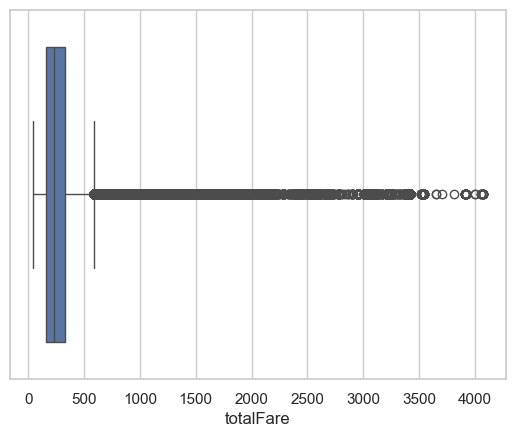

Q1: 158.60
Q3: 329.60
IQR: 171.00
Lower bound: -97.90, Upper bound: 586.10
Amount of outliers: 280,753, Amount of inliers: 6,435,194


In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
sns.boxplot(df, x='totalFare')
plt.show()

# Calculate bounds
q1, q3 = df['totalFare'].quantile([0.25, 0.75])
IQR = q3 - q1
lower_bound, upper_bound = q1 - 1.5 * IQR, q3 + 1.5 * IQR

# Print results
print(f'Q1: {q1:.2f}')
print(f'Q3: {q3:.2f}')
print(f'IQR: {IQR:.2f}')
print(f'Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}')

# Identify and count outliers
outliers = df[(df['totalFare'] < lower_bound) | (df['totalFare'] > upper_bound)]
inliers=len(df) - outliers.shape[0]
print(f'Amount of outliers: {outliers.shape[0]:,}, Amount of inliers: {inliers:,}')


count    6,715,947.00
mean           268.23
std            178.69
min             38.61
25%            158.60
50%            227.20
75%            329.60
max          4,076.60
Name: totalFare, dtype: object

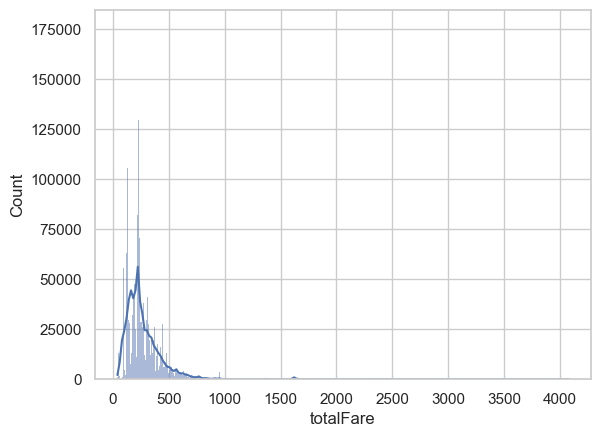

In [149]:
sns.histplot(df['totalFare'] ,kde=True)
df['totalFare'].describe().apply(lambda x: f'{x:,.2f}')

Our target variable has a right skewness.

Most of our price values in a range of under $1000.We can predict that these values contains alot of Economy class ,little of Businesss class.

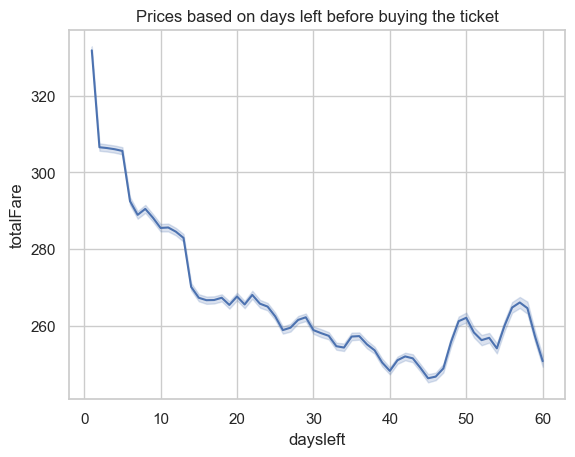

In [150]:
#price vs daysleft
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(df, x='daysleft', y='totalFare').set(title = 'Prices based on days left before buying the ticket')
#sns.regplot(data=df, x='daysleft', y='totalFare', scatter=False, color='red')
sns.set_theme(style='whitegrid')

The graph highlights how the prices rise slowly 45 days before the flight and then drastically start rising 15 days before the flight. this indicates that airlines are starting to raise prices as the flight fills up and fewer seats remain. 

Between approximately earlier than 45 days to 60 days, the price is highly fluctuate, but still under $280

The overall trend suggests that the best time to purchase tickets is well in advance (between 20-45 days, avoiding the fluctuation between earlier than 45 days and 60 days), as prices tend to be lower during this period. 

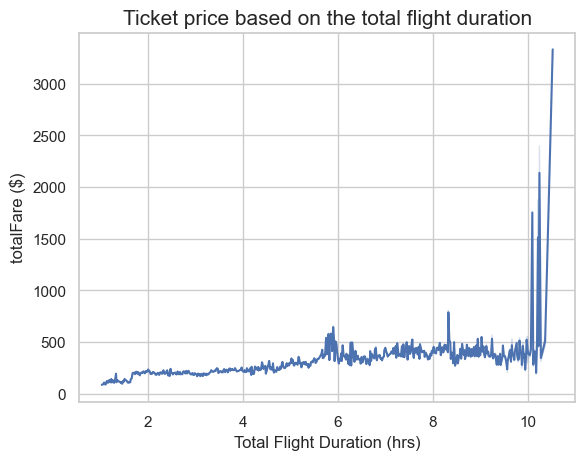

In [151]:
sns.lineplot(df, x= 'durationInHours', y='totalFare').set_title('Ticket price based on the total flight duration', fontsize = 15)
plt.grid(True)
plt.xlabel('Total Flight Duration (hrs)')
plt.ylabel('totalFare ($)')
plt.grid(True)


**How the Ticket Price change based on the Departure Time and Arrival Time?**


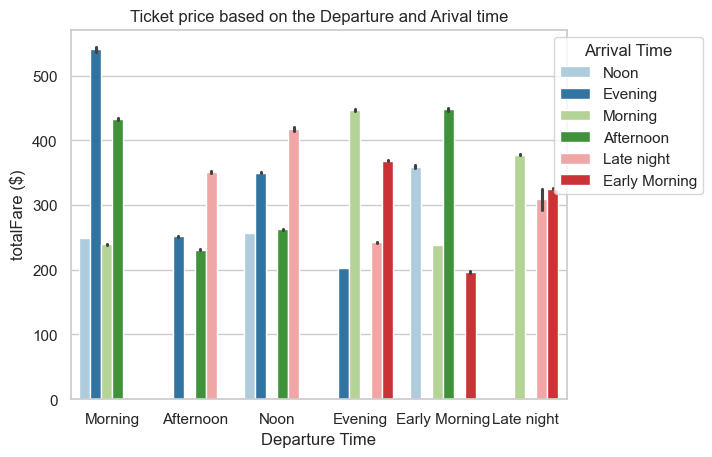

In [152]:
sns.barplot(df, x='departure_category', y='totalFare', hue='arrival_category', palette='Paired').set(title='Ticket price based on the Departure and Arival time', xlabel='Departure Time',ylabel = 'totalFare ($)')
plt.legend(title='Arrival Time', bbox_to_anchor=(1.29, 1), loc='upper right')
sns.set_style('whitegrid')

1. Departure Time Vs Ticket Price

Ticket Price is More for the Flights when the Departure Time is at Night

Ticket Price is almost equal for flights Having Departure time at Early_morning , Morning and Evening

Ticket Price is Low for the Flights Having Departure Time at Late_night

2. Arrival Time Vs Ticket Price

Ticket Price is More for the Flights when the Arrival Time is at Evening

Ticket Price is almost equal for flights Having Arrival time is at Morning and Night

Ticket Price is Low for the Flights Having Arrival Time at Late_night as same as Departure Time

**What is the most expensive flight between two cities?**

In [157]:
grouped_2_cities=df.groupby(['startingAirport','destinationAirport'])['totalFare'].mean().sort_values(ascending=False)
grouped_2_cities

startingAirport  destinationAirport
DFW              OAK                   809.055556
OAK              DFW                   784.750000
CLT              SFO                   634.009982
LAX              CLT                   588.920034
SFO              CLT                   552.952451
CLT              LAX                   541.533958
SFO              PHL                   477.579981
PHL              SFO                   476.717591
CLT              DEN                   476.566148
LAX              PHL                   453.636660
SFO              DTW                   449.461823
DTW              SFO                   444.823988
PHL              LAX                   442.734219
LAX              DTW                   440.233442
EWR              DEN                   434.899390
SFO              ATL                   429.389152
DTW              LAX                   428.727811
ATL              CLT                   426.938820
DFW              CLT                   425.114731
SFO           